### Set up

In [1]:
#Import modules

import pandas as pd
pd.options.display.max_columns = 99
pd.options.display.max_rows = 999
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# from numpy import arange, log10

import matplotlib.pyplot as plt
%matplotlib inline

## Load mu coeffs and use

In [2]:
CN_full = pd.read_csv('./../data/CN_full.csv', encoding = 'utf-8')
df = pd.read_csv('./../data/processed/mu_FE_decomposition.csv')


IOError: File ./../data/CN_full.csv does not exist

In [5]:
#Large countries
large_countries = df.groupby('PYOD')['VART'].sum().sort_values().tail(10).index

In [6]:
# Main products
df.groupby(['CN ID 4'])['VART'].sum().sort_values().tail(30).index

Int64Index([8536, 8431, 6110, 8481, 8414, 6204, 8544, 4011, 4202, 8443, 8413,
            9403, 9401, 9021, 7403, 8802, 8409, 8542, 6403, 8517, 3004, 8704,
            8411, 8471, 8803, 8708, 2710, 8703, 2711, 2709],
           dtype='int64', name=u'CN ID 4')

In [7]:
main_prods = [8409, 6403, 8517, 3004, 8411, 8704, 8471, 8803, 8802, 8708, 2710, 8703, 2711, 2709]
CN_full[['CN ID 4', 'CN label 4']].drop_duplicates().loc[CN_full['CN ID 4'].isin(main_prods)]

,CN ID 4,CN label 4
4067,2709,Petroleum oils and oils obtained from bitumino...
4070,2710,Petroleum oils and oils obtained from bitumino...
4142,2711,Petroleum gases and other gaseous hydrocarbons
5253,3004,"Medicaments (excluding goods of heading 3002, ..."
9013,6403,"Footwear with outer soles of rubber, plastics,..."
11267,8409,Parts suitable for use solely or principally w...
11278,8411,"Turbojets, turbopropellers and other gas turbines"
12213,8471,Automatic data-processing machines and units t...
12728,8517,"Telephone sets, including telephones for cellu..."
13339,8703,Motor cars and other motor vehicles principall...


In [8]:
df['ID'].sample(10)

2438283    457504504
4770511    598200400
2950698    437181076
7746529    484920194
141653     338519259
8307335    338752991
6417017    424532190
3350671    380341685
7725243    777777777
525769     558503769
Name: ID, dtype: int64

In [4]:
s = df.loc[df.ID == 672048154].round(3).sort_values(by = ['CN ID 4', 'PYOD', 'VART', 'YEAR'])#.merge(CN_full[['CN ID 4', 'CN label 4']].drop_duplicates())
s.head(10).style.bar(subset=['mu_fc', 'mu_cy', 'mu_pcy', 'x', 'residual'], align='mid', color=['#d65f5f', '#5fba7d'])

,ID,CN ID 4,PYOD,YEAR,VART,VART_sum_fpy,VART_sum_fy,frac,mu_fpcy,log_M_size,weight,mu_fpcy_w,mu_fc,mu_cy,mu_pcy,mu_mean,x,residual
131021,672048154,3923,CN,2008,32067,60703,55365550,0.528,0.05,7.743,0.001,0,0.14,0.001,-0.308,-0.513,-0.68,0.73
589624,672048154,3923,NL,2008,28636,60703,55365550,0.472,-0.05,7.743,0.001,-0,-0.628,0.142,-0.034,-0.513,-1.033,0.983
5805592,672048154,3924,BE,2006,64,90787,43440370,0.001,-2.258,7.638,0.002,-0.005,-0.416,0.145,-0.168,-0.513,-0.951,-1.306
165993,672048154,3924,CN,2006,65000,90787,43440370,0.716,0.404,7.638,0.002,0.001,0.14,-0.07,-0.275,-0.513,-0.718,1.122
1744249,672048154,3924,CN,2007,191453,214350,51495770,0.893,0.879,7.712,0.004,0.004,0.14,-0.032,-0.247,-0.513,-0.652,1.531
5808144,672048154,3924,CN,2008,344131,360815,55365550,0.954,1.19,7.743,0.007,0.008,0.14,0.001,-0.214,-0.513,-0.586,1.776
1638239,672048154,3924,ES,2007,2176,214350,51495770,0.01,-1.641,7.712,0.004,-0.007,-0.324,0.094,-0.025,-0.513,-0.767,-0.874
7859439,672048154,3924,IN,2007,2629,214350,51495770,0.012,-1.59,7.712,0.004,-0.007,0.286,0.124,-0.443,-0.513,-0.546,-1.044
6932974,672048154,3924,IN,2006,8989,90787,43440370,0.099,-0.91,7.638,0.002,-0.002,0.286,0.111,-0.144,-0.513,-0.26,-0.651
2395908,672048154,3924,IT,2007,12636,214350,51495770,0.059,-1.106,7.712,0.004,-0.005,-0.537,0.042,-0.008,-0.513,-1.016,-0.09


In [10]:
# coefficient of countries over time:

df['weight'] = df['VART_sum']/df['VART'].sum()

large_countries = [u'GB', u'US', u'ES', u'CN', u'IT', u'BE', u'DE'] #u'RU', u'CH', u'NL', 

In [13]:
df['size_bin'].value_counts().sort_index()


(3.5, 4.0]      28185
(4.0, 4.5]      71199
(4.5, 5.0]     191230
(5.0, 5.5]     719862
(5.5, 6.0]    1696127
(6.0, 6.5]    1624793
(6.5, 7.0]    1449833
(7.0, 7.5]    1213153
(7.5, 8.0]     876354
(8.0, 8.5]     512216
(8.5, 9.0]     341089
(9.0, 9.5]     118922
Name: size_bin, dtype: int64

In [3]:
# # import seaborn as sns

# from numpy import arange
# df['size_bin'] = pd.cut(df.log_M_size, bins = arange(3.5, 10, .5))
# main_prods = df.groupby(['CN ID 4'])['VART'].sum().sort_values().tail(26).index.values

# for p in main_prods:
    
#     print CN_full.set_index('CN ID 4')[['CN label 4']].drop_duplicates().loc[p]['CN label 4']
#     fig, axs = plt.subplots(1, 2, figsize = (14, 4))

#     for s in [0, 1]:
#         interval = [pd.Interval(4.5, 5.0, closed='right'), pd.Interval(8.5, 9.0, closed='right')][s]
#         ax = axs[s]
#         prod_df = df.loc[(df['CN ID 4'] == p) & (df['size_bin'] == interval)]
#     #     r = prod_df.groupby(['PYOD', 'size_bin'])[['mu_fc']].mean()
#         main_ctries = prod_df.groupby(['PYOD'])['VART'].sum().sort_values().tail(6).index.values
# #         mu_cy = prod_df[['PYOD', 'YEAR', 'mu_fc']].drop_duplicates().set_index(['PYOD', 'YEAR'])
#         prod_df['mu_fc_w'] = prod_df['mu_fc']*prod_df['weight']
#         mu_cy = prod_df.groupby(['PYOD', 'YEAR'])[['mu_fc_w']].sum()

#         mu_cy.loc[main_ctries].sort_index().unstack().T.plot(marker = 'o', ax=ax)
#         ax.legend(loc = (1, .1))
#         for tick in ax.get_xticklabels():
#             tick.set_rotation(45)
#     plt.show()

In [4]:
# from numpy import arange
# df.head()
# df['size_bin'] = pd.cut(df.log_M_size, bins = arange(3, 10, .5))
# # df['mu_fc_w'] = df['mu_fc'] * df['weight']
# # r = df.groupby(['PYOD', 'size_bin'])[['mu_fc_w']].sum()
# r = df.groupby(['PYOD', 'size_bin'])[['mu_fc']].mean()

# fig, ax = plt.subplots(figsize = (5, 4))

# r.loc[large_countries].sort_index().unstack().T.plot(marker = 'o', ax=ax)
# ax.legend(loc = (1, .1));

In [18]:
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

[3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]

Air or vacuum pumps, air or other gas compressors and fans; ventilating or recycling hoods incorporating a fan, whether or not fitted with filters


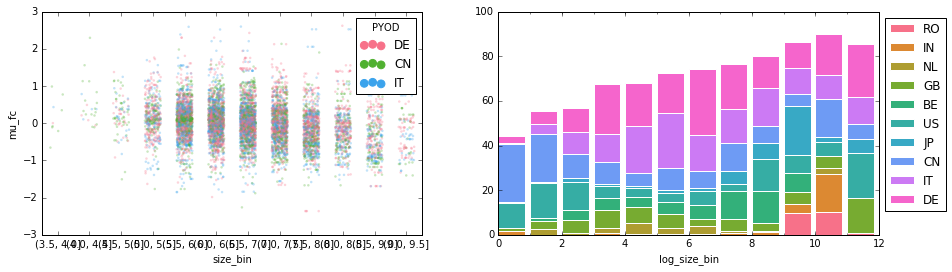

Women's or girls' suits, ensembles, jackets, blazers, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear)


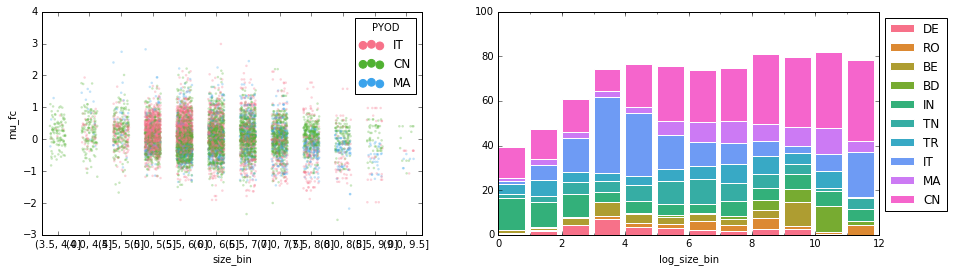

Insulated (including enamelled or anodised) wire, cable (including coaxial cable) and other insulated electric conductors, whether or not fitted with connectors; optical fibre cables, made up of individually sheathed fibres, whether or not assembled with electric conductors or fitted with connectors


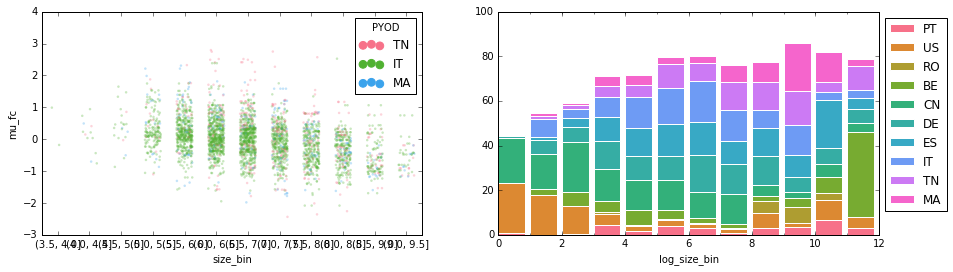

New pneumatic tyres, of rubber


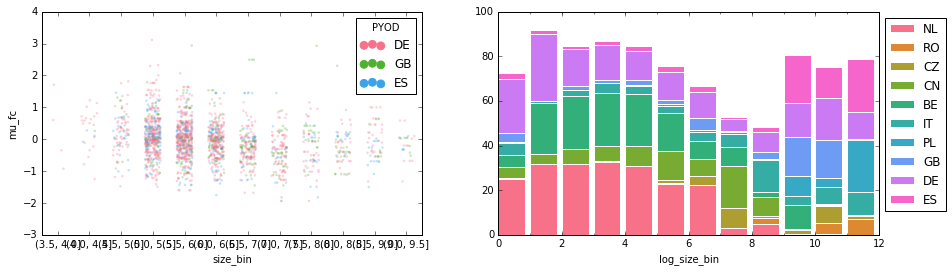

Trunks, suitcases, vanity cases, executive-cases, briefcases, school satchels, spectacle cases, binocular cases, camera cases, musical instrument cases, gun cases, holsters and similar containers; travelling-bags, insulated food or beverages bags, toilet bags, rucksacks, handbags, shopping-bags, wallets, purses, map-cases, cigarette-cases, tobacco-pouches, tool bags, sports bags, bottle-cases, jewellery boxes, powder boxes, cutlery cases and similar containers, of leather or of composition leather, of sheeting of plastics, of textile materials, of vulcanised fibre or of paperboard, or wholly or mainly covered with such materials or with paper


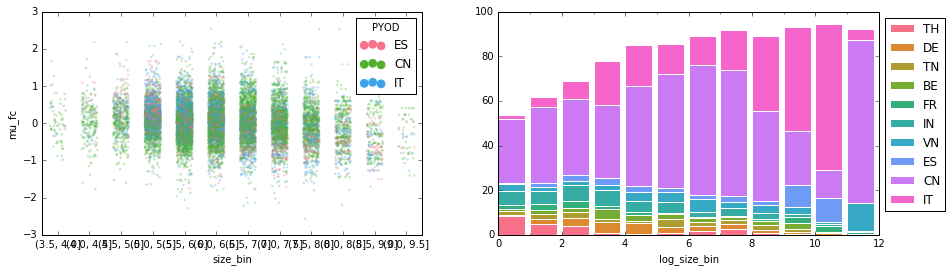

Printing machinery used for printing by means of plates, cylinders and other printing components of heading 8442; other printers, copying machines and facsimile machines, whether or not combined; parts and accessories thereof


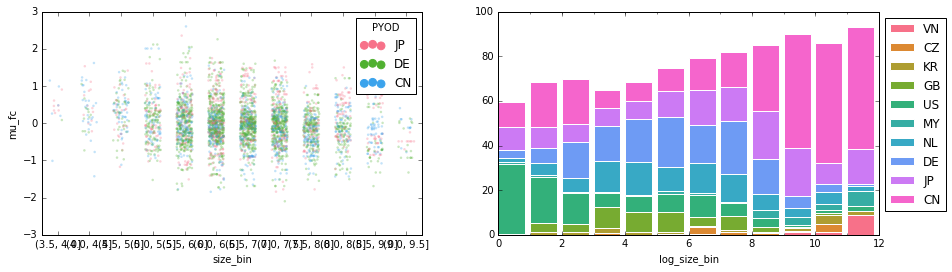

Pumps for liquids, whether or not fitted with a measuring device; liquid elevators


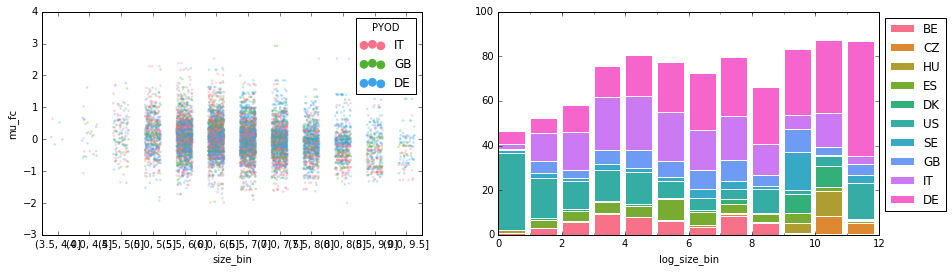

Other furniture and parts thereof


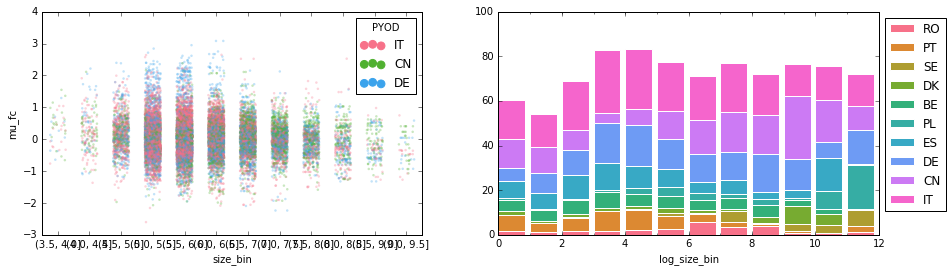

Seats (other than those of heading 9402), whether or not convertible into beds, and parts thereof


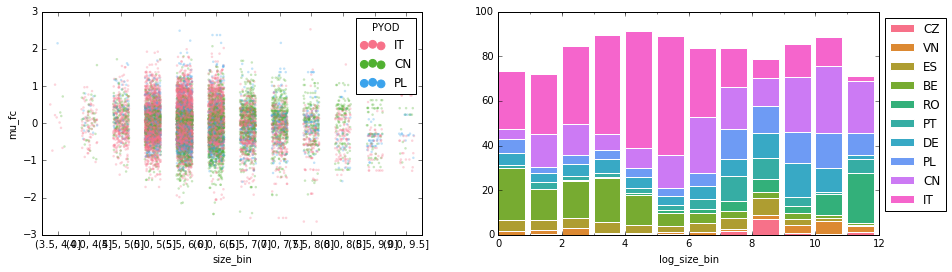

Orthopaedic appliances, including crutches, surgical belts and trusses; splints and other fracture appliances; artificial parts of the body; hearing aids and other appliances which are worn or carried, or implanted in the body, to compensate for a defect or disability


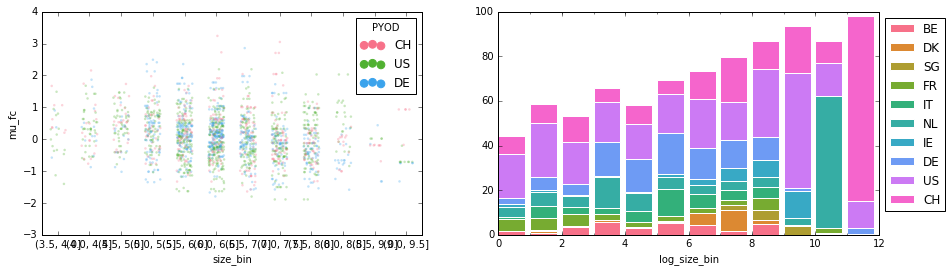

Refined copper and copper alloys, unwrought


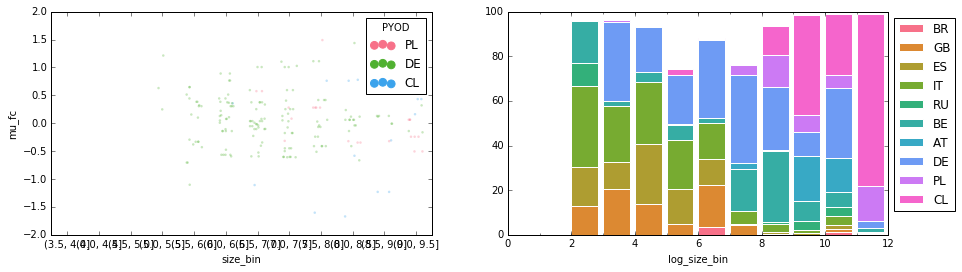

Other aircraft (for example, helicopters, aeroplanes); spacecraft (including satellites) and suborbital and spacecraft launch vehicles


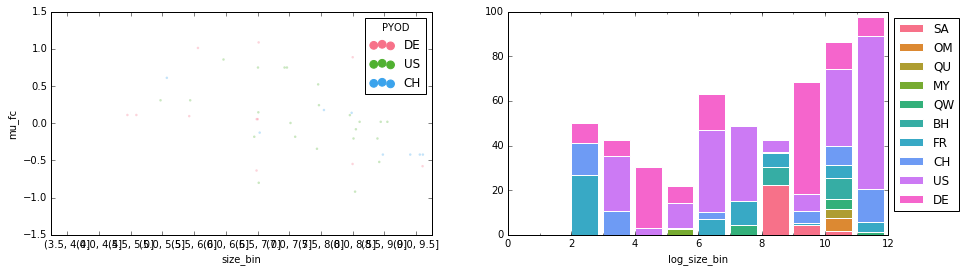

Parts suitable for use solely or principally with the engines of heading 8407 or 8408


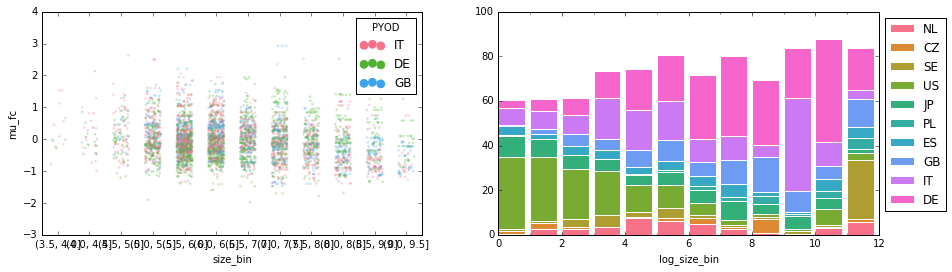

Electronic integrated circuits


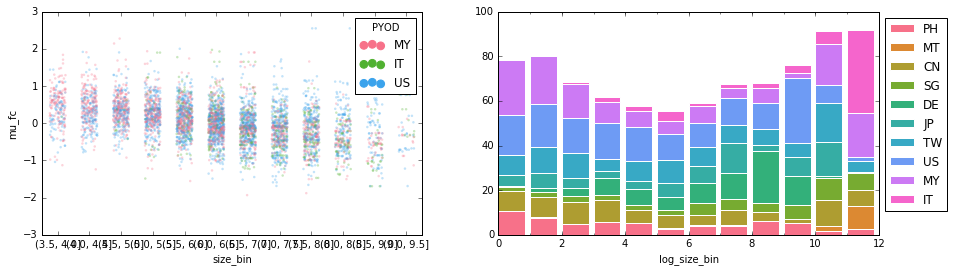

Footwear with outer soles of rubber, plastics, leather or composition leather and uppers of leather


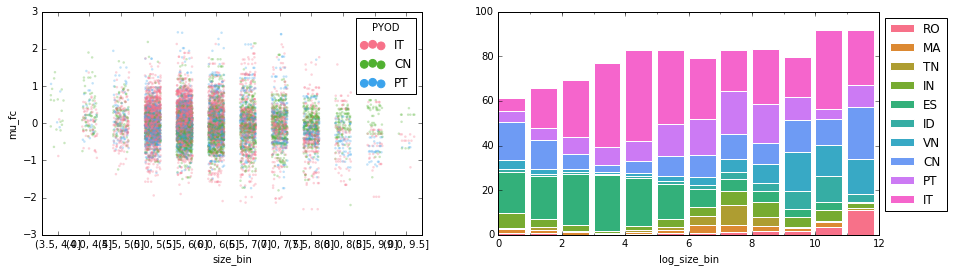

Telephone sets, including telephones for cellular networks or for other wireless networks; other apparatus for the transmission or reception of voice, images or other data, including apparatus for communication in a wired or wireless network (such as a local or wide area network), other than transmission or reception apparatus of heading 8443, 8525, 8527 or 8528


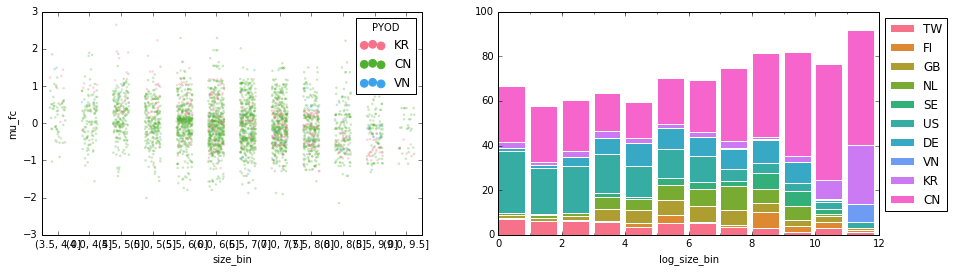

Medicaments (excluding goods of heading 3002, 3005 or 3006) consisting of mixed or unmixed products for therapeutic or prophylactic uses, put up in measured doses (including those in the form of transdermal administration systems) or in forms or packings for retail sale


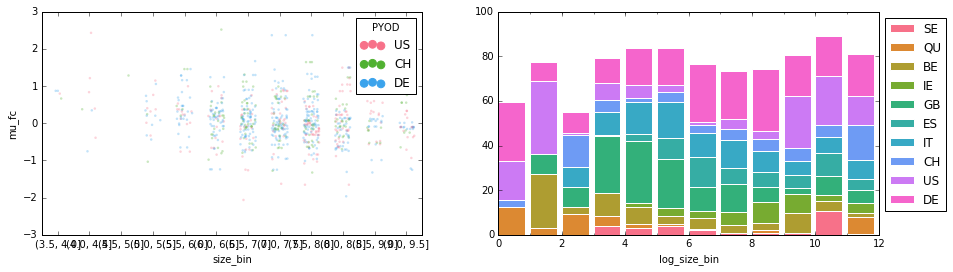

Motor vehicles for the transport of goods


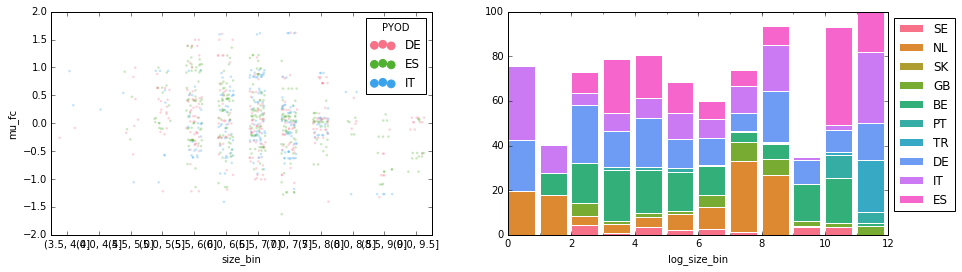

Turbojets, turbopropellers and other gas turbines


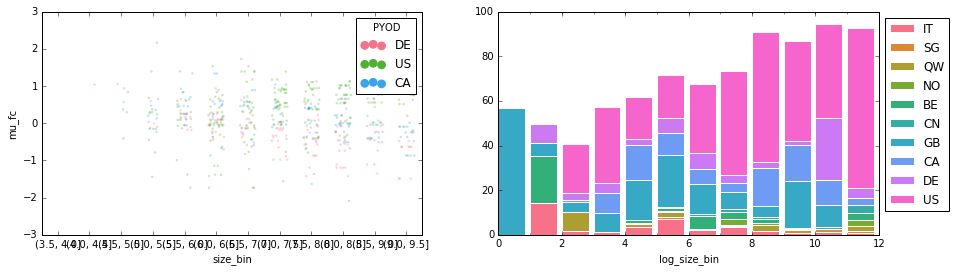

Automatic data-processing machines and units thereof; magnetic or optical readers, machines for transcribing data onto data media in coded form and machines for processing such data, not elsewhere specified or included


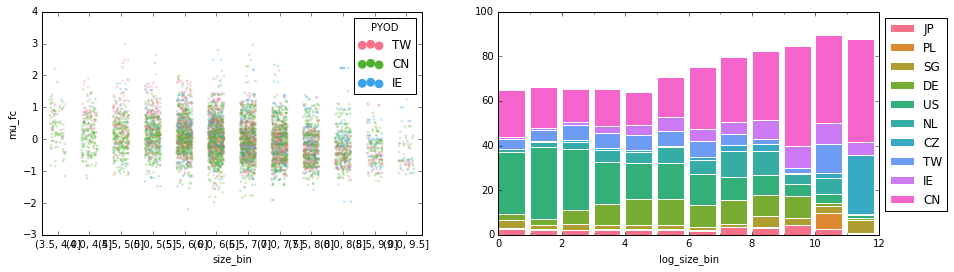

Parts of goods of heading 8801 or 8802


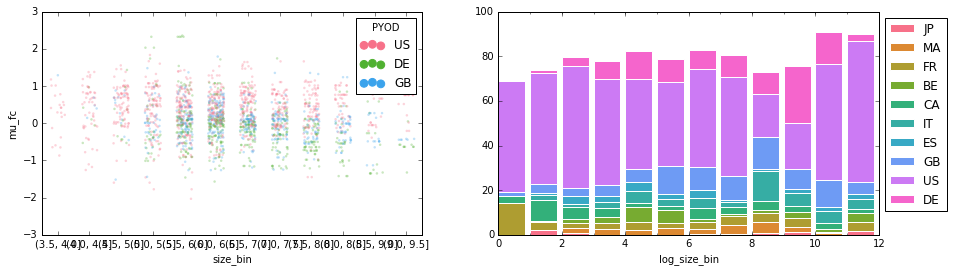

Parts and accessories of the motor vehicles of headings 8701 to 8705


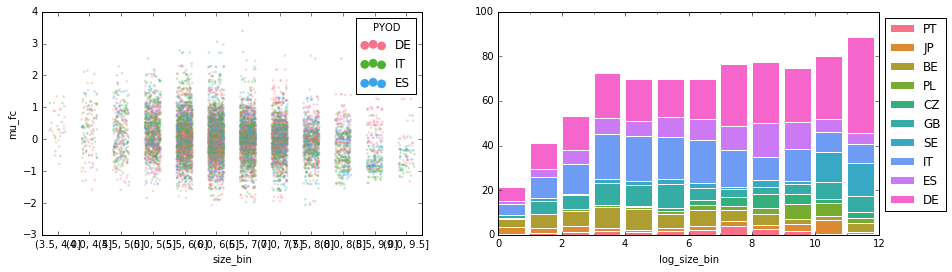

Petroleum oils and oils obtained from bituminous minerals, other than crude; preparations not elsewhere specified or included, containing by weight 70 % or more of petroleum oils or of oils obtained from bituminous minerals, these oils being the basic constituents of the preparations; waste oils


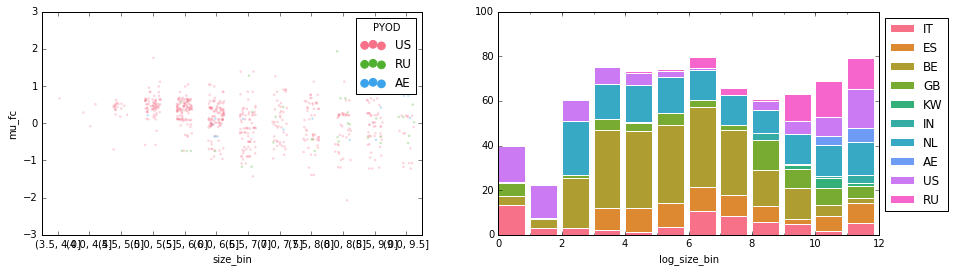

Motor cars and other motor vehicles principally designed for the transport of persons (other than those of heading 8702), including station wagons and racing cars


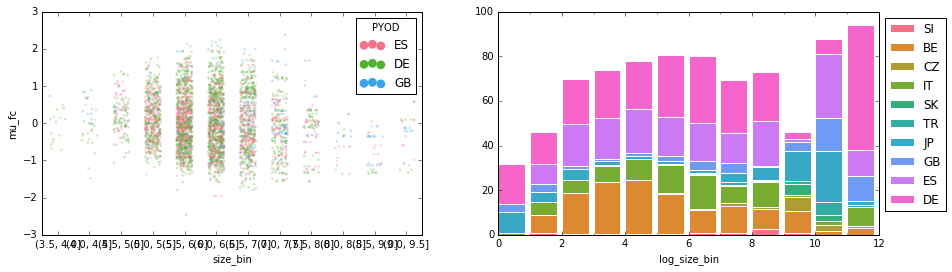

Petroleum gases and other gaseous hydrocarbons


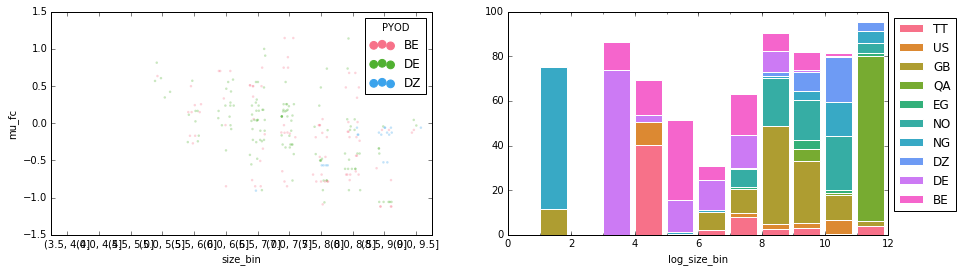

Petroleum oils and oils obtained from bituminous minerals, crude


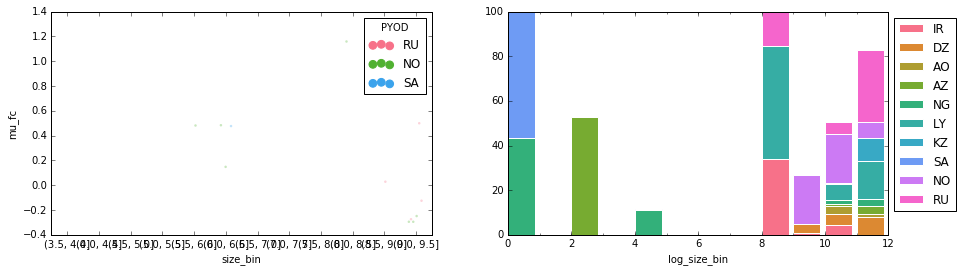

In [214]:
from numpy import arange
df['size_bin'] = pd.cut(df.log_M_size, bins = arange(3.5, 10, .5))
main_prods = df.groupby(['CN ID 4'])['VART'].sum().sort_values().tail(26).index.values

for p in main_prods:
    print CN_full.set_index('CN ID 4')[['CN label 4']].drop_duplicates().loc[p]['CN label 4']

    prod_df = df.loc[df['CN ID 4'] == p]
    n = 3
    stripplot_ctries = prod_df.groupby(['PYOD'])['VART'].sum().sort_values().tail(n).index.values
    fig, axs = plt.subplots(1, 2, figsize = (15, 4))
    palette = sns.color_palette("husl", stack_n)
    
    ## RIGHT PLOT
    stack_n = 10
    bar_ctries = prod_df.groupby(['PYOD'])['VART'].sum().sort_values().tail(stack_n).index.values
    xcp = prod_df.groupby(['PYOD', 'size_bin'])[['VART']].sum()
    trade_value = xcp.unstack()
    size_bin_pct = 100 * xcp.unstack() / xcp.unstack().sum()

    ax = axs[1]
    barWidth = 0.85
    # Create bars
    for c in range(stack_n):
        if c == 0:
            ax.bar(range(12), size_bin_pct.loc[bar_ctries[0]], 
                    edgecolor='white', width=barWidth, label = bar_ctries[0], color = palette[c])
        else:
            ax.bar(range(12), size_bin_pct.loc[bar_ctries[c]], bottom=size_bin_pct.loc[bar_ctries[:c]].sum(), 
                    edgecolor='white', width=barWidth, label = bar_ctries[c], color = palette[c])
    
    ax.set_xticks(range(12), [l.left for l in trade_value.columns.get_level_values(1)]) # Custom x axis len(trade_values.columns)
    ax.set_xlabel("log_size_bin")
    ax.set_ylim(0, 100)
    ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1) # Add a legend


    ## LEFT PLOT
    ax = axs[0]
    bplot=sns.stripplot(y='mu_fc', x='size_bin', 
                   data=prod_df.loc[df.PYOD.isin(stripplot_ctries)].sample(frac = .5), 
                   jitter=.25, 
                   marker='.', 
                   alpha=0.3,
                   hue = 'PYOD',
                   palette = sns.color_palette("husl", n),
                   ax = ax)
    
    
#     r = prod_df.groupby(['PYOD', 'size_bin'])[['mu_fc']].mean()
#     r.loc[main_ctries].sort_index().unstack().T.plot(marker = 'o', ax=ax)
#     ax.legend(loc = (1, .1))
    plt.show()

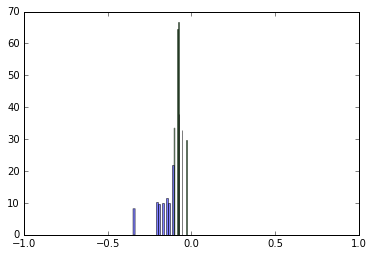

In [36]:
FE_ = FE.loc[FE['CN ID 4'] == 8409]
# plt.hist(FE_.loc[FE_['PYOD'] == 'DE'].mu_pcy.values, 160, alpha = .5, normed = True)
plt.hist(FE_.loc[FE_['PYOD'] == 'CN'].mu_pcy.values, 20, alpha = .5, normed = True) #green
plt.hist(FE_.loc[FE_['PYOD'] == 'US'].mu_pcy.values, 20, alpha = .5, normed = True) #green
plt.xlim(-1, 1)
plt.show()

In [75]:
# country_competitiveness = FE.loc[FE['PYOD'] == 'CL'].groupby('CN ID 4')[['mu_pcy', 'residual']].describe().reset_index()

In [77]:
# df = country_competitiveness.merge(CN_full[['CN ID 4', 'CN label 4']].drop_duplicates(), left_on = ('CN ID 4',), right_on = 'CN ID 4')
# df.loc[df[('mu_pcy', 'count')] > 100].sort_values(by = ('mu_pcy', 'mean'), ascending = False)

,CN ID 4,"(CN ID 4, )","(mu_pcy, count)","(mu_pcy, mean)","(mu_pcy, std)","(mu_pcy, min)","(mu_pcy, 25%)","(mu_pcy, 50%)","(mu_pcy, 75%)","(mu_pcy, max)","(residual, count)","(residual, mean)","(residual, std)","(residual, min)","(residual, 25%)","(residual, 50%)","(residual, 75%)","(residual, max)",CN label 4
45,808,808,715.0,0.246030,0.143618,0.002970,0.071725,0.301423,0.302771,0.511742,715.0,-0.169690,0.572490,-1.768744,-0.546027,-0.178807,0.161137,2.314952,"Apples, pears and quinces, fresh"
43,806,806,777.0,0.204384,0.051865,0.131063,0.186070,0.200021,0.241421,0.302843,777.0,-0.170175,0.504645,-1.741888,-0.517233,-0.170273,0.147522,1.755909,"Grapes, fresh or dried"
48,811,811,224.0,0.140669,0.143973,-0.089394,-0.001589,0.115564,0.305380,0.325588,224.0,-0.196463,0.513748,-1.596506,-0.473061,-0.228226,0.033141,1.931963,"Fruit and nuts, uncooked or cooked by steaming..."
58,1005,1005,156.0,0.119525,0.096785,-0.046615,0.057423,0.120457,0.187521,0.290492,156.0,0.180179,0.595061,-1.158556,-0.219079,0.181438,0.508211,2.242103,Maize (corn)
235,4703,4703,159.0,0.113058,0.134975,-0.048498,-0.047760,0.114218,0.170323,0.332641,159.0,-0.058608,0.331803,-1.088390,-0.210542,-0.075734,0.096655,1.248603,"Chemical wood pulp, soda or sulphate, other th..."
10,304,304,133.0,0.099322,0.247767,-0.115166,-0.115166,-0.000683,0.312257,0.579395,133.0,-0.158785,0.555846,-2.074393,-0.512884,-0.161503,0.152709,1.648774,Fish fillets and other fish meat (whether or n...
102,2204,2204,708.0,0.076673,0.062083,-0.028220,0.018284,0.075892,0.107386,0.192718,708.0,-0.095159,0.349499,-1.401661,-0.243788,-0.113349,0.045241,1.354783,"Wine of fresh grapes, including fortified wine..."
46,809,809,426.0,0.069776,0.079868,-0.061180,-0.016997,0.092031,0.141648,0.180262,426.0,-0.240926,0.607749,-1.816559,-0.661984,-0.286596,0.130551,1.840384,"Apricots, cherries, peaches (including nectari..."
35,712,712,128.0,-0.025550,0.108678,-0.180661,-0.081872,-0.053864,0.088385,0.172534,128.0,-0.207803,0.489657,-1.602905,-0.439475,-0.156939,0.027801,2.115826,"Dried vegetables, whole, cut, sliced, broken o..."
47,810,810,611.0,-0.028755,0.055830,-0.106857,-0.076594,-0.016689,-0.010239,0.080057,611.0,-0.265980,0.582298,-2.161597,-0.614713,-0.273931,0.025982,2.697329,"Other fruit, fresh"


In [26]:
country_yr_table = FE.groupby(['PYOD', 'YEAR'])[['mu_cy', 'residual']].mean().round(3).unstack().loc[[u'RU', u'CH', u'NL', u'GB', u'US', u'ES', u'CN', u'IT', u'BE', u'DE']]

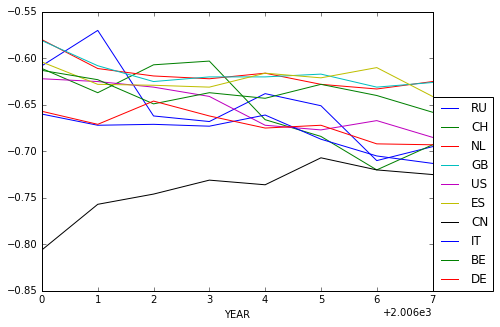

In [27]:
fig, ax = plt.subplots(1, figsize = (7, 5))
for i in range(len(country_yr_table)):
    country_yr_table['mu_cy'].iloc[i].plot(ax = ax, label = country_yr_table.index[i])
plt.legend(loc = (1, 0))

In [19]:
df.groupby('FC')[['residual']].mean().sample(10)

,residual
FC,
703620443US,-0.021030
409419298CH,-0.201745
341165801TW,-0.223842
403124654IT,0.093721
826050106FR,-0.193841
439002130DE,0.366163
394657365ES,0.299577
317275022IT,0.529402
793861352IT,-0.080007


In [20]:
df.groupby('CPY')[['residual']].mean().sample(10)

,residual
CPY,
NL69082009,-0.466131
KP54072006,-0.668964
GB76082007,-0.019553
SE84842011,-0.263215
GB60032009,0.014452
TW85092012,-0.203683
AL7022011,-1.362454
OM85072013,-0.979287
CH70052008,-0.120542


In [21]:
df.groupby('CY')[['residual']].mean().sample(30).sort_index()

,residual
CY,
AD2006,-0.654758
AG2006,-0.319487
AL2010,-0.499180
AO2006,-0.655498
AT2007,-0.175712
BB2006,-0.558500
BE2011,0.131903
BG2011,-0.503270
BH2006,-0.712732


In [22]:
df.groupby('YEAR')[['residual']].mean()

,residual
YEAR,
2006,0.036832
2007,0.024384
2008,0.022439
2009,0.022527
2010,0.011933
2011,-0.021171
2012,-0.030924
2013,-0.041628


In [23]:
df.groupby('PYOD')[['residual']].mean().sample(20)

,residual
PYOD,
AO,-0.789170
MX,-0.579793
SC,-1.032864
VI,-0.693517
QA,-0.918652
KP,-0.862852
IN,-0.203698
UG,-0.696227
MM,-0.616833


In [12]:
pr = 4202
prs = out.groupby(['CN ID 4'])['VART'].sum().sort_values().tail(30).index

def f(mu, *args):
    data, row = args[0], args[1]
    x_star = erfinv(data)[0]
    return erf(x_star - mu) - row

for pr in prs:
    print(CN_full.set_index('CN ID 4').loc[pr]['CN label 4'].drop_duplicates().values)
    product_df = out.loc[out['CN ID 4'] == pr]
    sample = product_df.loc[product_df.ID.isin(product_df.ID.sample(1))]

    sample = sample.groupby(['YEAR', 'PYOD'])['VART'].sum().reset_index()
    sample['pct'] = sample.groupby(['YEAR'])['VART'].apply(lambda x:
                                                     x / float(x.sum()))
    sample = sample[['YEAR', 'PYOD', 'VART', 'pct']].reset_index(drop = True)
    
    fraction_values = sample.set_index(['YEAR', 'PYOD'])[['pct']].unstack().fillna(0).mean()
    fv = fraction_values.sort_values(ascending = False)
    
    
#     res = fv.apply(lambda row: optimize.brentq(f, -1, 10, args=(fv - .5, row - .5)))

#     mu = 0; variance = 1/20.
#     sigma = math.sqrt(variance)
#     x = np.linspace(-3.5, 3.5, 1000)

#     fig, ax = plt.subplots(1, figsize = (10, 3))
#     try:

#         for i in range(8):

#                 lab = str(res.index.get_level_values(1)[i])+', '+str(100*fv.round(2)[i])
#                 mu = res[i]
#                 ax.plot(x,mlab.normpdf(x, mu, sigma), label = lab)
#         #         ax.plot(x, .5*(1 + erf(x - mu)), label = res.index.get_level_values(1)[i])
#                 if i == 0:
#                     sum_ = .5*(1 + erf(x - mu))
#                 else:
#                     sum_ += .5*(1 + erf(x - mu))

#         ax.plot(x, sum_, '--')

#     except:
#         pass
        
#     ax.set_ylim(0, 2)
#     ax.set_xlim(-2, 1)
    
#     plt.legend(loc = 'upper left')
#     plt.show()

[ u'Parts suitable for use solely or principally with the machinery of headings\xa08425 to 8430']
[ u'Air or vacuum pumps, air or other gas compressors and fans; ventilating or recycling hoods incorporating a fan, whether or not fitted with filters']
[ u'Coffee, whether or not roasted or decaffeinated; coffee husks and skins; coffee substitutes containing coffee in any proportion']
[ u'Jerseys, pullovers, cardigans, waistcoats and similar articles, knitted or crocheted']
[ u'Taps, cocks, valves and similar appliances for pipes, boiler shells, tanks, vats or the like, including pressure-reducing valves and thermostatically controlled valves']
[ u'Insulated (including enamelled or anodised) wire, cable (including coaxial cable) and other insulated electric conductors, whether or not fitted with connectors; optical fibre cables, made up of individually sheathed fibres, whether or not assembled with electric conductors or fitted with connectors']
[u'New pneumatic tyres, of rubber']
[ u'Pri

KeyboardInterrupt: 

### Show some examples of firm sourcing strategies in time

In [ ]:
# df_.set_index('ID').loc[sample_ids]

In [ ]:

sample_ids = df.sample(10)['ID'].values

#Select firms that import more than 10% of some product
# df_ = firm_prod.loc[(firm_prod['CN ID 4'] == 601) & (firm_prod['pct'] > 1)]
# sample_ids = df_.sample(10)['ID'].values

for id_ in sample_ids:
    df_ID = df.loc[df.ID == id_]
    
    by_product = df_ID.groupby('CN ID 4')['VART'].sum().sort_values(ascending = False)
    by_product/=by_product.sum()
    main_prods = by_product[by_product.cumsum() < .99].index
    df_ID_mp = df_ID.loc[df_ID['CN ID 4'].isin(main_prods)]
    
    table = df_ID_mp.set_index([u'CN ID 4', u'PYOD', u'QUARTER', u'YEAR'])['VART'].unstack([-1, -2]).fillna(0)
    table[('min','')] = 0; table[('max','')] = table.max().max()

    display(CN_full.set_index('CN ID 4')[['CN label 4']].drop_duplicates().loc[df_ID_mp['CN ID 4'].unique()].sort_index())

    display(table.T.style.bar(color='#d65f5f'))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(np.log10(firm_prod['pct']).replace(-np.inf, np.nan).dropna().values, 100)
plt.show()